In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/MyDrive/spotify_data

/content/gdrive/MyDrive/spotify_data


In [ ]:
import pandas as pd
import json

artists = pd.read_csv('artists.csv')
data = pd.read_csv('data_o.csv')
tracks = pd.read_csv('tracks.csv')
data_by_artist = pd.read_csv('data_by_artist_o.csv')
data_by_genres = pd.read_csv('data_by_genres_o.csv')
data_by_year = pd.read_csv('data_by_year_o.csv')
data_top50 = pd.read_csv('file1.csv')
# Reading the json as a dict
with open('dict_artists.json') as json_data:
    dict_artists = json.load(json_data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [ ]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
data_by_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [ ]:
data_by_artist.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [ ]:
data_by_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [ ]:
data_top50.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,loudness,popularity,speechiness,valence
0,0,0.995,0.708,158648,0.1950,-12.428,0,0.0506,0.7790
1,1,0.994,0.379,282133,0.0135,-28.454,0,0.0462,0.0767
2,2,0.604,0.749,104300,0.2200,-19.924,0,0.9290,0.8800
3,3,0.995,0.781,180760,0.1300,-14.734,0,0.0926,0.7200
4,4,0.990,0.210,687733,0.2040,-16.829,1,0.0424,0.0693


In [ ]:
# id는 무의미 할걸로 판단 후 삭제
data = data.drop(columns='id')

#column정리 (except 'popularity' <---target), (artists, name, release_date <--- object)
features = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness',
            'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

data[data['popularity'] > 95]['name']


19606             Mood (feat. iann dior)
19608    WAP (feat. Megan Thee Stallion)
19610                          positions
19611                             Dakiti
19612            What You Know Bout Love
19616                    Blinding Lights
19618                           Dynamite
Name: name, dtype: object

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f731ef15e10>,
                   feature_index=None, feature_names=None,
                   labels=array(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo'], dtype='<U16'),
                   method='pearson', sort=False)

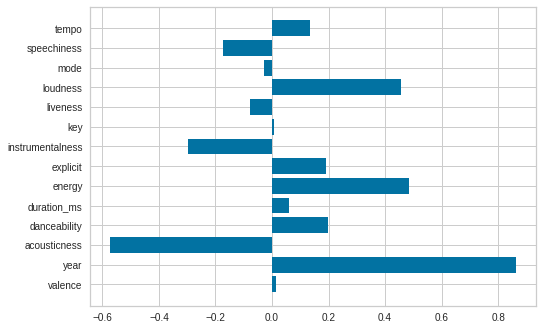

In [ ]:
# insight 발견을 위한 데이터 시각화 진행

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from yellowbrick.target import FeatureCorrelation
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

#correraltion 확인
X = data[features]
y = data['popularity']

# Create a list of the feature names
features = np.array(features)

from yellowbrick.target import FeatureCorrelation
# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer

# year, energy, loudness

In [ ]:
# 9개 특성 양수
# 5개 특성 음수 

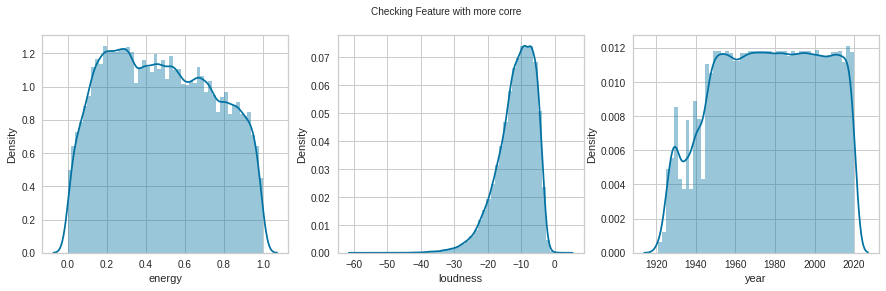

In [ ]:
features_o = ['energy','loudness','year']  # corr>0.4 인 특성들 

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(data['energy'])

plt.subplot(1, 3, 2)
sns.distplot(data['loudness'])

plt.subplot(1, 3, 3)
sns.distplot(data['year'])

plt.suptitle('Checking Feature with more corre ', fontsize = 10)
plt.show()

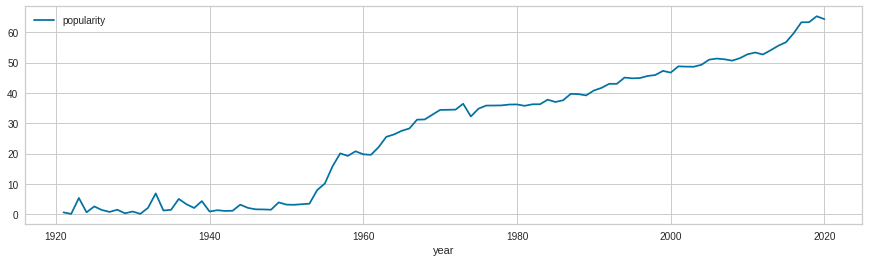

In [ ]:
# EDA, Feature Engeenering start!

#년도별로 확인
decade_pivot = data_by_year.pivot_table(values='popularity', index='year', aggfunc=sum)
decade_pivot.head()
decade_pivot.plot()

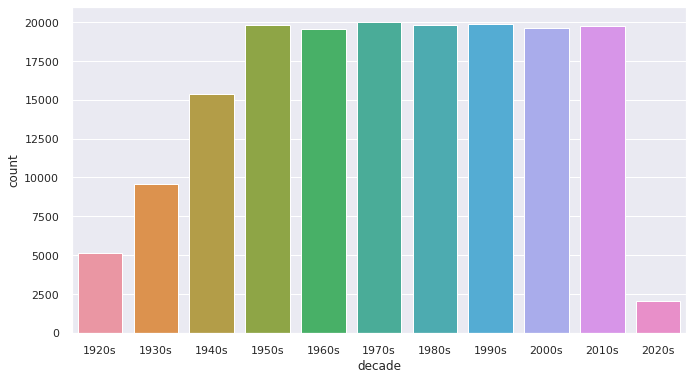

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff

plot_data = [
    go.Scatter(
        x=data_by_year['year'],
        y=data_by_year['acousticness'],
        name = 'acousticness'
    ),
    go.Scatter(
        x=data_by_year['year'],
        y=data_by_year['danceability'],
        name = 'danceability'
    ),
    go.Scatter(
        x=data_by_year['year'],
        y=data_by_year['energy'],
        name = 'energy'
    ),
    go.Scatter(
        x=data_by_year['year'],
        y=data_by_year['instrumentalness'],
        name = 'instrumentalness'
    ),
    go.Scatter(
        x=data_by_year['year'],
        y=data_by_year['liveness'],
        name = 'liveness'
    ),
    go.Scatter(
        x=data_by_year['year'],
        y=data_by_year['valence'],
        name = 'valence'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Sound features'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#장르별 시각화

data_by_genres['genres'].value_counts()

deep delta blues                1
australian singer-songwriter    1
modern old-time                 1
second line                     1
middle earth                    1
                               ..
latincore                       1
choral                          1
gujarati pop                    1
peruvian hip hop                1
preschool children's music      1
Name: genres, Length: 2973, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

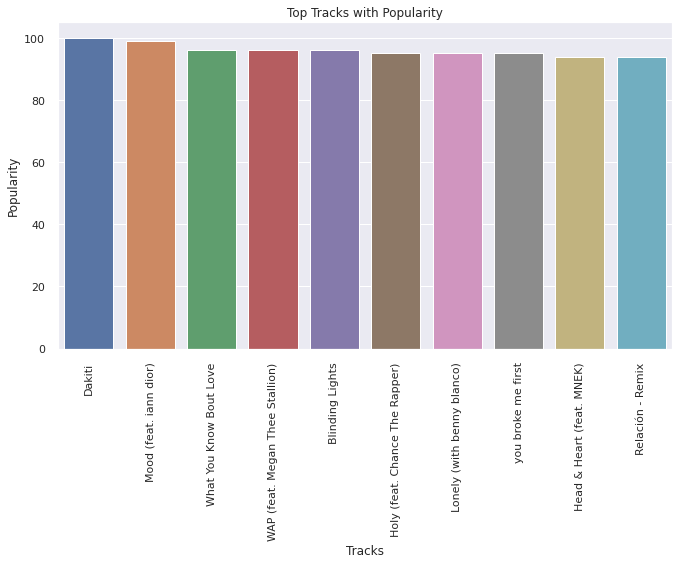

In [ ]:
top10_genres = data_by_genres.nlargest(10, 'popularity')
x = data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top Tracks with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Tracks')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

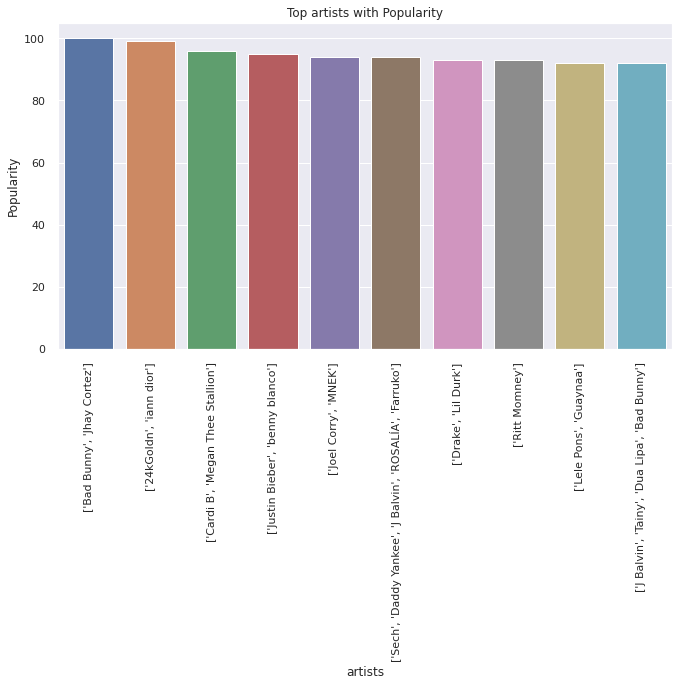

In [ ]:
x = data.groupby("artists")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('artists')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

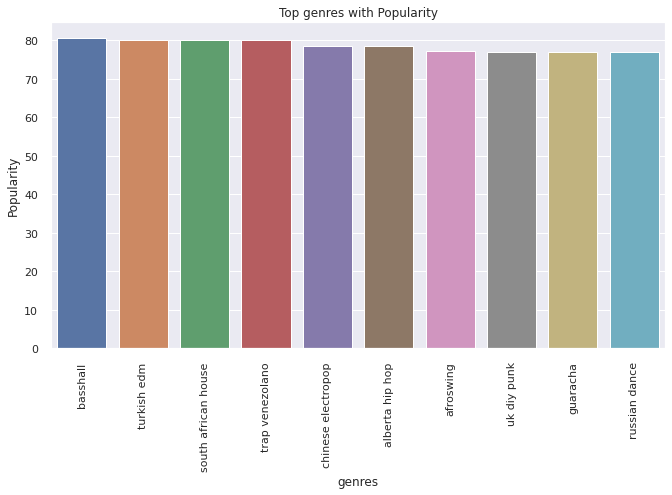

In [ ]:
x = data_by_genres.groupby("genres")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Top genres with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('genres')
plt.xticks(rotation = 90)

In [ ]:
data['artists'].value_counts()

['Эрнест Хемингуэй']                                                                                                          1211
['Эрих Мария Ремарк']                                                                                                         1068
['Francisco Canaro']                                                                                                           942
['Frank Sinatra']                                                                                                              630
['Ignacio Corsini']                                                                                                            628
                                                                                                                              ... 
['Kurt Weill', 'Hope Emerson', 'Remo Lota', 'Polyna Stoska', 'Helen Arden', 'Street Scene Orchestra', 'Maurice Abravanel']       1
['Rafique Ghaznavi']                                                               

In [ ]:
# # features = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness',
# #           'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

# use_features = features = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness',
#             'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo']

In [ ]:
# modeling start!

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

In [ ]:
X, y = data[features], data['popularity']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print("num of  train sample in train set:",X_train.shape)
print("Number of samples in validation set:",y_test.shape)

num of  train sample in train set: (114337, 14)
Number of samples in validation set: (56316,)


In [ ]:
# define models
models = { 
    "SVM": svm.SVR(),
    "RandomForestReg": ensemble.RandomForestRegressor(),
    "GradientBoostingReg": ensemble.GradientBoostingRegressor()
}

Important features
____________________________________________________________
97.13


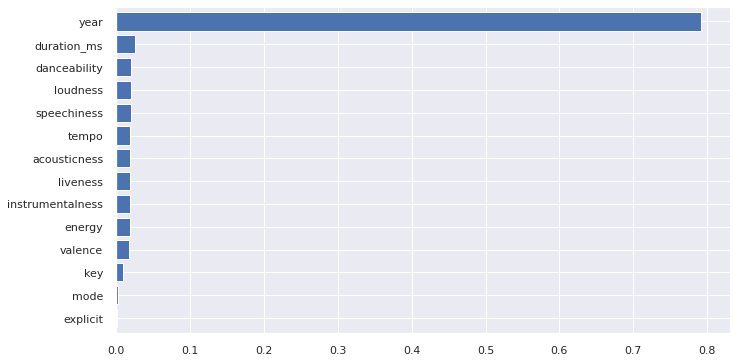

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train,y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)